In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# --- Data ---
MAGIC   = [0.28, 0.28, 2.43, 2.53]
SAVER   = [48.4, 47.6, 1027.9, 1584.0]
ENHANCE = [0.2, 0.2, 7.0, 8.0]
DCA     = [6.75, 5.52, 34.91, 18.84]
WAVDESC = [0.05, 0.07, 1.38, 1.34]

methods = ["MAGIC", "SAVER", "ENHANCE", "DCA", "WAVDESC"]
averages = [
    np.mean(MAGIC),
    np.mean(SAVER),
    np.mean(ENHANCE),
    np.mean(DCA),
    np.mean(WAVDESC)
]

df = pd.DataFrame({"Method": methods, "Average": averages})

In [7]:
# Custom order
order = ["DCA", "ENHANCE", "MAGIC", "SAVER", "WAVDESC"]

# Custom colors
colors = {
    "SAVER": "#00b9ff",
    "DCA": "#e6550d",
    "MAGIC": "#66c2a5",
    "WAVDESC": "#ce6dbd",
    "ENHANCE": "#bcbd22"   # deep yellow
}

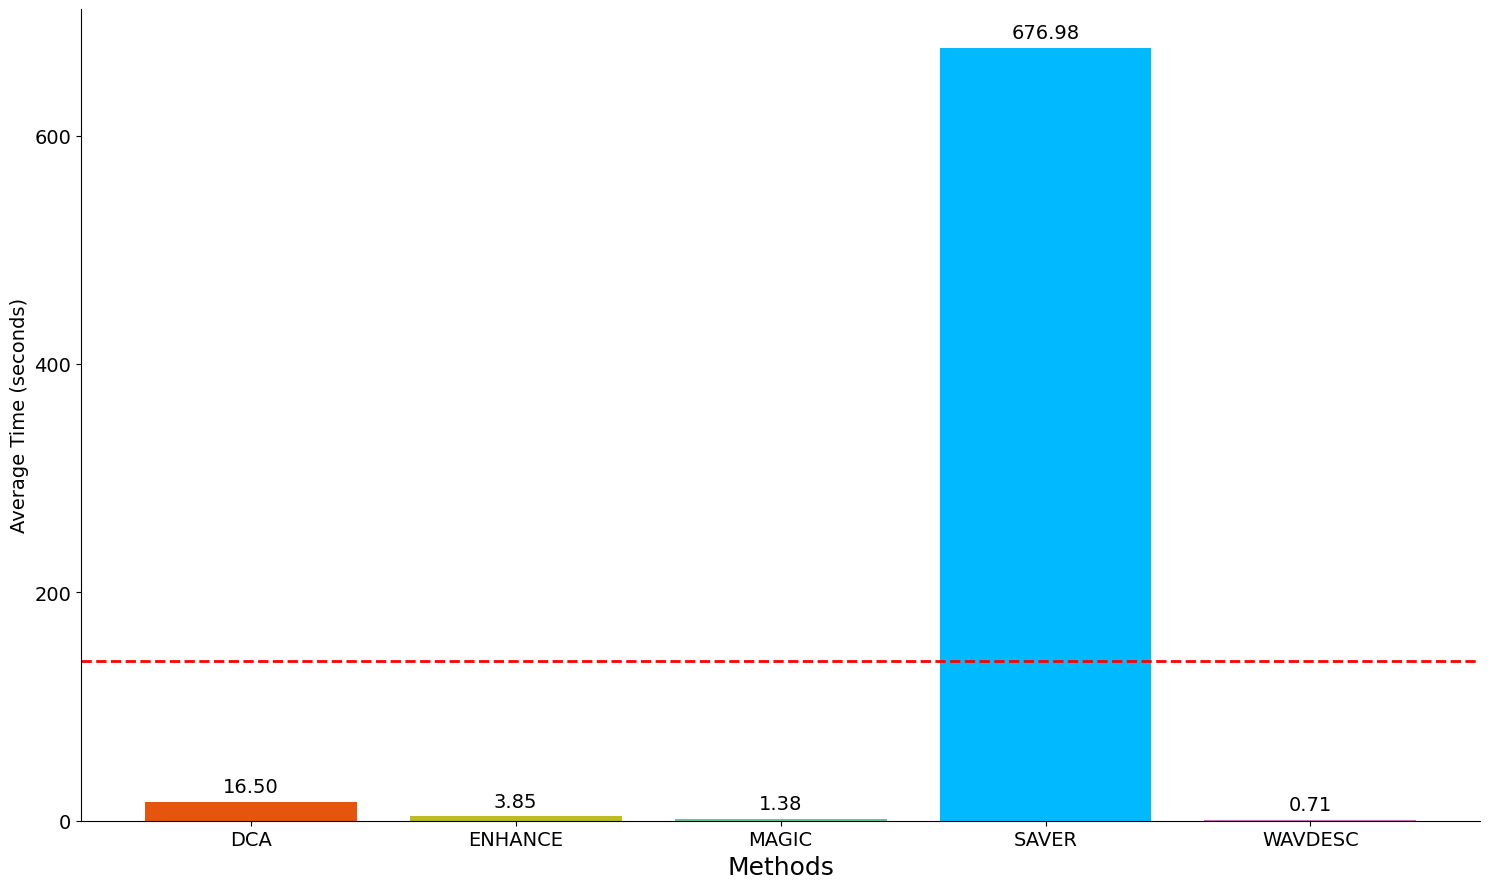

In [15]:
# --- Plot ---
plt.figure(figsize=(15, 9))
bars = plt.bar(df["Method"], df["Average"], 
               color=[colors[m] for m in df["Method"]])

# Reorder bars by sorting df
df = df.set_index("Method").loc[order].reset_index()
bars = plt.bar(df["Method"], df["Average"], 
               color=[colors[m] for m in df["Method"]])

# Add bar labels
for bar, avg in zip(bars, df["Average"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f"{avg:.2f}", ha="center", va="bottom", fontsize=14)

overall_avg = df["Average"].sum()/len(df["Average"])
plt.axhline(overall_avg, color="red", linestyle="--", linewidth=2)

# Custom y-axis ticks
plt.yticks([0, 200, 400, 600], fontsize=14)
plt.xticks(fontsize=14)

# Labels and style
plt.xlabel("Methods", fontsize=18)
plt.ylabel("Average Time (seconds)", fontsize=14)
# plt.title("Average Runtime of Methods", fontsize=20)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("/home/isabel/Desktop/final-images/average_runtime_custom.png", dpi=1200)
plt.show()
